# Predicting the Appearance of Cited Article on Social Media Site-YouTube!
### Sneha Ravi Chandran   -  Z1856678
### Priyanjani Chandra       -  Z1864520

In [45]:
import os, json
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [46]:
# Reading the file we saved after cleaning the data from json
new_df = pd.read_csv('D:/Fall_2019/Big_Data_Analytics/altmetric_clean_full.csv')

In [47]:
new_df.head()

,Altmetric_ID,Altmetric_Score,Mendeley,CiteULike,Twitter,Facebook,Video,GooglePlus,Reddit,Blogs,Peer_Reviews,News,F1000,Wikipedia,Youtube
0,4203182.0,2.00,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21895036.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33329846.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21985072.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,434953.0,1.85,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380518 entries, 0 to 380517
Data columns (total 15 columns):
Altmetric_ID       380518 non-null float64
Altmetric_Score    380273 non-null float64
Mendeley           380518 non-null float64
CiteULike          380518 non-null float64
Twitter            380518 non-null float64
Facebook           380518 non-null float64
Video              380518 non-null float64
GooglePlus         380518 non-null float64
Reddit             380518 non-null float64
Blogs              380518 non-null float64
Peer_Reviews       380518 non-null float64
News               380518 non-null float64
F1000              380518 non-null float64
Wikipedia          380518 non-null float64
Youtube            380518 non-null float64
dtypes: float64(15)
memory usage: 43.5 MB


In [49]:
# Checking for NaN values
new_df[pd.isnull(new_df).any(axis=1)]

,Altmetric_ID,Altmetric_Score,Mendeley,CiteULike,Twitter,Facebook,Video,GooglePlus,Reddit,Blogs,Peer_Reviews,News,F1000,Wikipedia,Youtube
1120,38336481.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2962,27457458.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4194,38647796.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4745,40315420.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6053,38580613.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6368,38080101.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9026,38081137.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9976,28741740.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10766,38614195.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12502,36841615.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Dropping the rows with nan values
new_df = new_df.dropna()

In [51]:
# Checking again for NaN values
new_df[pd.isnull(new_df).any(axis=1)]

,Altmetric_ID,Altmetric_Score,Mendeley,CiteULike,Twitter,Facebook,Video,GooglePlus,Reddit,Blogs,Peer_Reviews,News,F1000,Wikipedia,Youtube


In [52]:
new_df.describe()

,Altmetric_ID,Altmetric_Score,Mendeley,CiteULike,Twitter,Facebook,Video,GooglePlus,Reddit,Blogs,Peer_Reviews,News,F1000,Wikipedia,Youtube
count,3.802730e+05,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000,380273.000000
mean,2.054845e+07,3.948642,15.858402,0.083424,2.761403,0.195844,0.004589,0.036868,0.007600,0.070839,0.007902,0.180334,0.009443,0.069850,0.002922
std,1.459154e+07,28.977480,73.237051,0.811584,29.552019,3.163081,0.159885,1.282862,0.139913,0.621680,0.165607,2.805016,0.124761,1.263858,0.053973
min,1.001630e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.820511e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.918978e+07,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.633731e+07,3.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.383127e+07,4856.798000,18028.000000,247.000000,5053.000000,1005.000000,52.000000,460.000000,18.000000,153.000000,29.000000,685.000000,12.000000,654.000000,1.000000


In [8]:
# Converting the type of columns (other than Altmetric_score) to integer
df1=new_df['Altmetric_Score']
df2 = new_df.drop('Altmetric_Score', axis=1)
df2=df2.apply(pd.to_numeric, downcast='integer', errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380273 entries, 0 to 380517
Data columns (total 14 columns):
Altmetric_ID    380273 non-null int32
Mendeley        380273 non-null int16
CiteULike       380273 non-null int16
Twitter         380273 non-null int16
Facebook        380273 non-null int16
Video           380273 non-null int8
GooglePlus      380273 non-null int16
Reddit          380273 non-null int8
Blogs           380273 non-null int16
Peer_Reviews    380273 non-null int8
News            380273 non-null int16
F1000           380273 non-null int8
Wikipedia       380273 non-null int16
Youtube         380273 non-null int8
dtypes: int16(8), int32(1), int8(5)
memory usage: 12.0 MB


In [9]:
df2.insert(1, 'Altmetric_Score', df1 )
df2.head()

,Altmetric_ID,Altmetric_Score,Mendeley,CiteULike,Twitter,Facebook,Video,GooglePlus,Reddit,Blogs,Peer_Reviews,News,F1000,Wikipedia,Youtube
0,4203182,2.00,1,0,4,0,0,0,0,0,0,0,0,0,0
1,21895036,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33329846,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21985072,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
4,434953,1.85,0,0,2,0,0,0,0,0,0,0,0,0,0


In [10]:
df2.columns

Index(['Altmetric_ID', 'Altmetric_Score', 'Mendeley', 'CiteULike', 'Twitter',
       'Facebook', 'Video', 'GooglePlus', 'Reddit', 'Blogs', 'Peer_Reviews',
       'News', 'F1000', 'Wikipedia', 'Youtube'],
      dtype='object')

In [11]:
# Separtaing features and labels
X = df2.drop(['Altmetric_ID', 'Youtube'], axis=1)
y = df2['Youtube']

In [12]:
# Scaling the feature data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['Altmetric_Score', 'Mendeley', 'CiteULike', 'Twitter',
       'Facebook', 'Video', 'GooglePlus', 'Reddit', 'Blogs', 'Peer_Reviews', 'News', 'F1000', 'Wikipedia'])

In [13]:
X_scaled.head()

,Altmetric_Score,Mendeley,CiteULike,Twitter,Facebook,Video,GooglePlus,Reddit,Blogs,Peer_Reviews,News,F1000,Wikipedia
0,0.069019,0.013654,0.0,0.135355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063843,0.000000,0.0,0.067677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df2.Youtube.value_counts()

0    379162
1      1111
Name: Youtube, dtype: int64

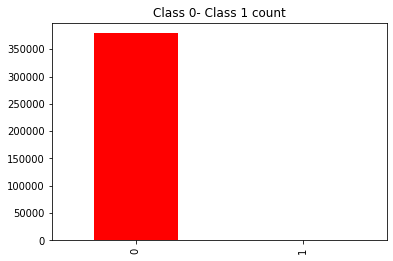

In [15]:
ax = df2.Youtube.value_counts().plot(kind='bar', color= 'red',
                                    figsize=(6,4),
                                    title="Class 0- Class 1 count")


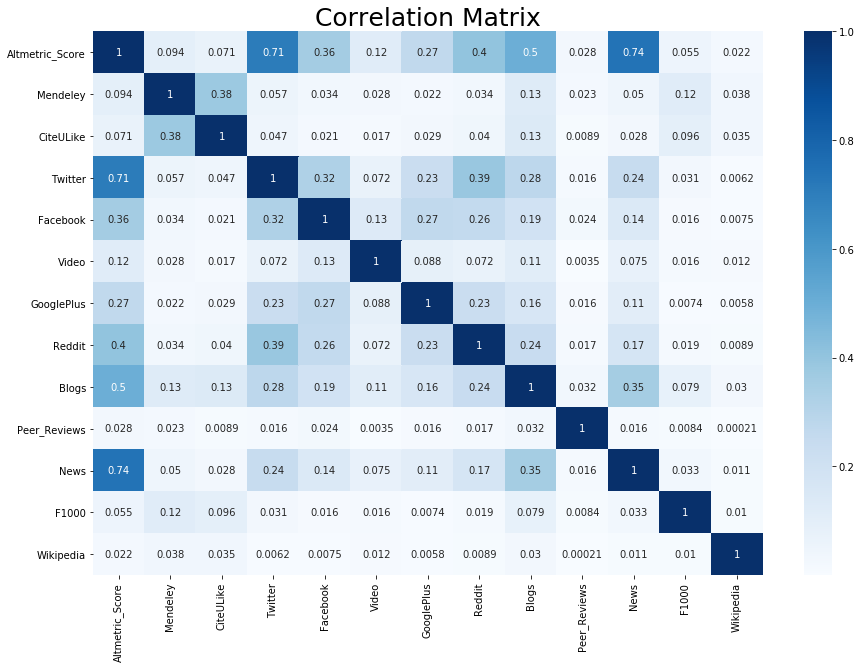

In [16]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(X_scaled.corr(), annot=True, cmap="Blues" );
plt.title('Correlation Matrix', fontsize=25)
plt.show()

### Dropping Altmetric Score due to high correlation with the other features

In [17]:
X_scaled = X_scaled.drop('Altmetric_Score',axis =1)

In [18]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380273 entries, 0 to 380272
Data columns (total 12 columns):
Mendeley        380273 non-null float64
CiteULike       380273 non-null float64
Twitter         380273 non-null float64
Facebook        380273 non-null float64
Video           380273 non-null float64
GooglePlus      380273 non-null float64
Reddit          380273 non-null float64
Blogs           380273 non-null float64
Peer_Reviews    380273 non-null float64
News            380273 non-null float64
F1000           380273 non-null float64
Wikipedia       380273 non-null float64
dtypes: float64(12)
memory usage: 34.8 MB


In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify = y, random_state=42)

In [20]:
# plotting confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print('Confusion matrix\n')
    print(pd.DataFrame(cm))

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
class_names = [0,1]

# Logistic Regression
Performing Logistic regression on the dataset having video as one of the feature

In [22]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
logmodel.fit(X_train, y_train)

# Predicting the Training set results to check for overfitting
y_train_pred = logmodel.predict(X_train)
cm_train_LR=confusion_matrix(y_train, y_train_pred)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


----------- Training - Confusion Matrix - LogisticRegression -----------

Confusion matrix

        0    1
0  265413    0
1       0  778


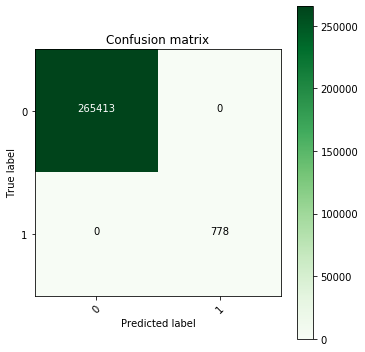

In [24]:
# Plotting Confusion Matrix
print("----------- Training - Confusion Matrix - LogisticRegression -----------\n")
plot_confusion_matrix(cm_train_LR, classes=class_names)

In [25]:
# Predicting the Test set results
y_pred = logmodel.predict(X_test)
cm_LR=confusion_matrix(y_test, y_pred)

----------- Confusion Matrix - LogisticRegression -----------

Confusion matrix

        0    1
0  113749    0
1       0  333


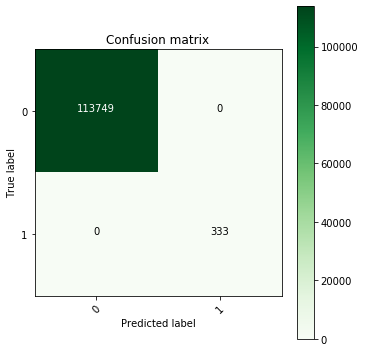

In [26]:
# Plotting Confusion Matrix
print("----------- Testing - Confusion Matrix - LogisticRegression -----------\n")
plot_confusion_matrix(cm_LR, classes=class_names)

In [27]:
# classification report for precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113749
           1       1.00      1.00      1.00       333

    accuracy                           1.00    114082
   macro avg       1.00      1.00      1.00    114082
weighted avg       1.00      1.00      1.00    114082



### Taking equal samples of the class labels


In [28]:
df_Youtube = df2[df2['Youtube']==1]
df_Youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 51 to 380477
Data columns (total 15 columns):
Altmetric_ID       1111 non-null int32
Altmetric_Score    1111 non-null float64
Mendeley           1111 non-null int16
CiteULike          1111 non-null int16
Twitter            1111 non-null int16
Facebook           1111 non-null int16
Video              1111 non-null int8
GooglePlus         1111 non-null int16
Reddit             1111 non-null int8
Blogs              1111 non-null int16
Peer_Reviews       1111 non-null int8
News               1111 non-null int16
F1000              1111 non-null int8
Wikipedia          1111 non-null int16
Youtube            1111 non-null int8
dtypes: float64(1), int16(8), int32(1), int8(5)
memory usage: 44.5 KB


In [29]:
df_Not = df2[df2['Youtube']==0]
df_Not.shape

(379162, 15)

In [30]:
df_Not2 = df_Not.sample(n = 616) 
df_Not2.shape

(616, 15)

In [31]:
df_equal =  df_Youtube.append(df_Not2, ignore_index=True)
df_equal.shape

(1727, 15)

In [32]:
X_eq = df_equal.drop(['Altmetric_ID', 'Youtube'], axis=1)
y_eq = df_equal['Youtube']

In [33]:
X_train_eq, X_test_eq, y_train_eq, y_test_eq = train_test_split(X_eq, y_eq, test_size=0.3, stratify=y_eq, random_state=42)

## Logistic Regression
Performing Logistic regression on the equal samples of class labels

In [34]:
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
logmodel.fit(X_train_eq, y_train_eq)

# Predicting the Test set results
y_pred = logmodel.predict(X_test_eq)
cm_LR=confusion_matrix(y_test_eq, y_pred)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


----------- Confusion Matrix - LogisticRegression -----------

Confusion matrix

     0    1
0  185    0
1    0  334


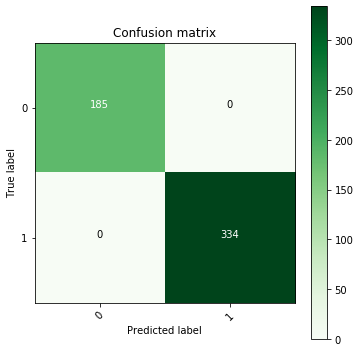

In [35]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - LogisticRegression -----------\n")
plot_confusion_matrix(cm_LR, classes=class_names)

In [36]:
# classification report for precision and recall
print(classification_report(y_test_eq, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       334

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



### Checking the feature count

In [37]:
df2[df2['Video'] != 0].shape

(1111, 15)

### Dropping Video Feature

We are dropping the video feature because it is highly correlated with youtube column values.

In [38]:
X_scaled_new = X_scaled.drop('Video', axis =1)
X_scaled_new.head()

,Mendeley,CiteULike,Twitter,Facebook,GooglePlus,Reddit,Blogs,Peer_Reviews,News,F1000,Wikipedia
0,0.013654,0.0,0.135355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.067677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new, y, test_size=0.3, stratify = y, random_state=42)

## Logistic Regression
Performing logistic regression on the dataset without video column.

In [40]:
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
logmodel.fit(X_train, y_train)

# Predicting the Training set results to check for overfitting
y_train_pred = logmodel.predict(X_train)
cm_train_LR=confusion_matrix(y_train, y_train_pred)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


----------- Training - Confusion Matrix - LogisticRegression -----------

Confusion matrix

        0   1
0  265382  31
1     750  28


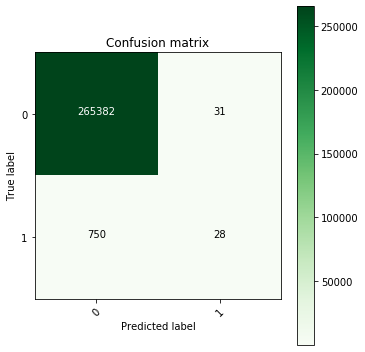

In [41]:
# Plotting Confusion Matrix
print("----------- Training - Confusion Matrix - LogisticRegression -----------\n")
plot_confusion_matrix(cm_train_LR, classes=class_names)

In [42]:
# Predicting the Test set results
y_pred = logmodel.predict(X_test)
cm_LR=confusion_matrix(y_test, y_pred)

----------- Testing - Confusion Matrix - LogisticRegression -----------

Confusion matrix

        0  1
0  113743  6
1     326  7


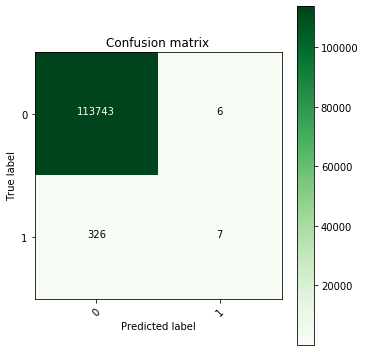

In [43]:
# Plotting Confusion Matrix
print("----------- Testing - Confusion Matrix - LogisticRegression -----------\n")
plot_confusion_matrix(cm_LR, classes=class_names)

In [44]:
# classification report for precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113749
           1       0.54      0.02      0.04       333

    accuracy                           1.00    114082
   macro avg       0.77      0.51      0.52    114082
weighted avg       1.00      1.00      1.00    114082



# Oversampling
### Performing oversampling technique to the highly imbalanced dataset

In [110]:
from sklearn.utils import resample

# resetting the index for the dataframes
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Combining the training labels and features
X = pd.concat([X_train, y_train], axis=1)

In [111]:
# Separating minority and majority labels
not_youtube = X[X.Youtube==0]
youtube = X[X.Youtube==1]

# Upsample minority
youtube_upsampled = resample(youtube,
                          replace=True, # sample with replacement
                          n_samples=len(not_youtube), # match number in majority class
                          random_state=42) # reproducible results

# Combining majority and upsampled minority
upsampled = pd.concat([not_youtube, youtube_upsampled])

# Checking new label counts
upsampled.Youtube.value_counts()

1    265413
0    265413
Name: Youtube, dtype: int64

In [112]:
# Splitting the training data after sampling
y_train_up = upsampled.Youtube
X_train_up = upsampled.drop('Youtube', axis =1)

 Applying LR model to the data after oversampling

In [113]:
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

# Fit the model using the training data
logmodel.fit(X_train_up, y_train_up)

# Predicting the Test set results
y_pred = logmodel.predict(X_test)
cm_LR=confusion_matrix(y_test, y_pred)

----------- Confusion Matrix - LR (Oversampling) -----------

Confusion matrix

        0     1
0  104415  9334
1     150   183


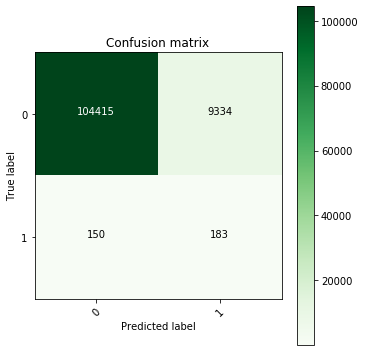

In [114]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - LR (Oversampling) -----------\n")
plot_confusion_matrix(cm_LR, classes=class_names)

In [115]:
# classification report for precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    113749
           1       0.02      0.55      0.04       333

    accuracy                           0.92    114082
   macro avg       0.51      0.73      0.50    114082
weighted avg       1.00      0.92      0.95    114082



## Receiver Operating Characteristic (ROC) Curve

AUC: 0.85


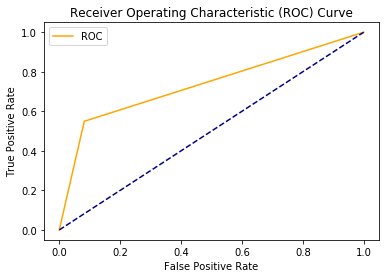

In [118]:
# roc curve
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

probs = logmodel.predict_proba(X_test)
probs = probs[:, -1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Precision- Recall Curve

Logistic: f1=0.037 auc=0.073


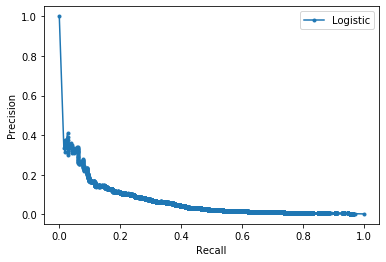

In [127]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
y_prob = logmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]
# predict class values
y_pred = logmodel.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (f1, auc))
# plot the precision-recall curves
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Undersampling
### Performing oversampling technique to the highly imbalanced dataset

In [128]:
# Undersample the minority class
youtube_undersampled = resample(not_youtube,
                          replace=False, # sample without replacement
                          n_samples=len(youtube), # match number in minority class
                          random_state=42) # reproducible results

In [129]:
# combine minority and downsampled majority
downsampled = pd.concat([youtube_undersampled, youtube])

# checking counts
downsampled.Youtube.value_counts()

1    778
0    778
Name: Youtube, dtype: int64

In [130]:
# Splitting the training data after sampling
y_train_new = downsampled.Youtube
X_train_new = downsampled.drop('Youtube', axis =1)

 Applying LR model to the data after undersampling

In [131]:
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

# Fit the model using the training data
logmodel.fit(X_train_new, y_train_new)

# Predicting the Test set results
y_pred = logmodel.predict(X_test)
cm_LR=confusion_matrix(y_test, y_pred)

----------- Confusion Matrix - LR (Undersampling) -----------

Confusion matrix

        0      1
0  102545  11204
1     134    199


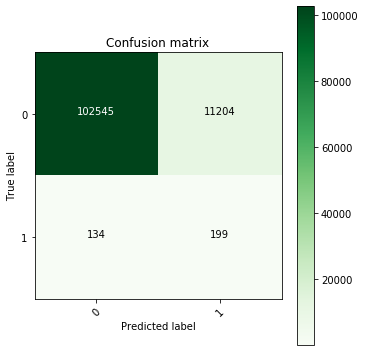

In [132]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - LR (Undersampling) -----------\n")
plot_confusion_matrix(cm_LR, classes=class_names)

# SMOTE to handle class imbalance

### Generation of synthetic data for handling the imbalanced data

In [133]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [134]:
print("Before applying SMOTE, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before applying SMOTE, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before applying SMOTE, counts of label '1': 778
Before applying SMOTE, counts of label '0': 265413 



In [135]:
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state = 42) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('After applying SMOTE, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After applying SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape)) 

After applying SMOTE, the shape of train_X: (530826, 11)
After applying SMOTE, the shape of train_y: (530826,) 



In [136]:
print("After applying SMOTE, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After applying SMOTE, counts of label '0': {}".format(sum(y_train_res == 0))) 

After applying SMOTE, counts of label '1': 265413
After applying SMOTE, counts of label '0': 265413


## Logistic Regression with SMOTE

In [137]:
# Create instance (i.e. object) of LogisticRegression
logmodel_smote = LogisticRegression(solver='liblinear')

# Fit the model using the training data
logmodel_smote.fit(X_train_res, y_train_res)

# Predicting the Test set results
y_pred_smote = logmodel_smote.predict(X_test)
cm_LR_smote=confusion_matrix(y_test, y_pred_smote)

----------- Confusion Matrix - LogisticRegression with SMOTE -----------

Confusion matrix

        0     1
0  104148  9601
1     145   188


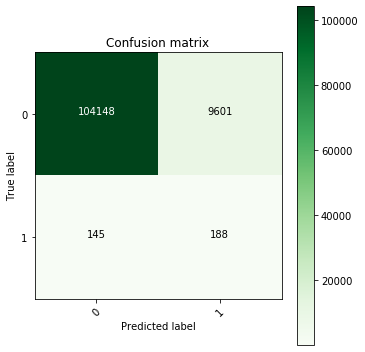

In [138]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - LogisticRegression with SMOTE -----------\n")
plot_confusion_matrix(cm_LR_smote, classes=class_names)

In [139]:
# classification report for precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    113749
           1       0.02      0.60      0.03       333

    accuracy                           0.90    114082
   macro avg       0.51      0.75      0.49    114082
weighted avg       1.00      0.90      0.94    114082



## Receiver Operating Characteristic (ROC) Curve

AUC: 0.85


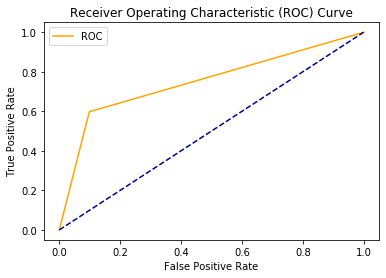

In [142]:
# roc curve
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

probs = logmodel_smote.predict_proba(X_test)
probs = probs[:, -1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Precision- Recall Curve

Logistic: f1=0.034 auc=0.071


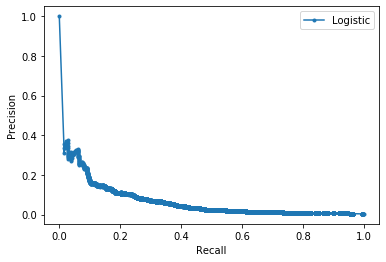

In [143]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
y_prob = logmodel_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]
# predict class values
y_pred = logmodel.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (f1, auc))
# plot the precision-recall curves
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## SMOTE with RandomForest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
RF_model = RandomForestClassifier(random_state=42)

In [59]:
pipeline_smote = make_pipeline_imb(SMOTE(random_state=42), RF_model)
pipeline_smote.fit(X_train_res, y_train_res.ravel())

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=4, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                

In [60]:
y_pred = pipeline_smote.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred)

----------- Confusion Matrix - RandomForest with SMOTE -----------

Confusion matrix

        0     1
0  110080  3669
1     314    19


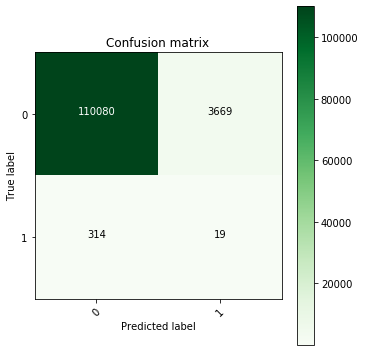

In [61]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - RandomForest with SMOTE -----------\n")
plot_confusion_matrix(cm_RF, classes=class_names)

# XGBoost

In [62]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

----------- Confusion Matrix - XGBoost Classifier -----------

Confusion matrix

        0  1
0  113746  3
1     327  6


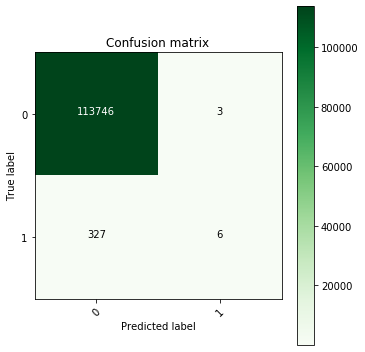

In [63]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - XGBoost Classifier -----------\n")
plot_confusion_matrix(cm, classes=class_names)

# Decision Tree Classifier

## Oversampled Data

In [64]:
# Fitting Decision Tree Classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train_up, y_train_up)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [65]:
cm_dec_tree = confusion_matrix(y_test, y_pred)

----------- Confusion Matrix - DecisionTreeClassifier -----------

Confusion matrix

        0     1
0  105796  7953
1     296    37


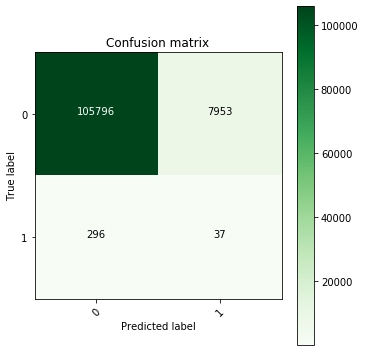

In [66]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - DecisionTreeClassifier -----------\n")
plot_confusion_matrix(cm_dec_tree, classes=class_names)

## Undersampled Data

In [67]:
# Fitting Decision Tree Classifier to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train_new, y_train_new)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [68]:
cm_dec_tree = confusion_matrix(y_test, y_pred)

----------- Confusion Matrix - DecisionTreeClassifier -----------

Confusion matrix

       0      1
0  92789  20960
1    121    212


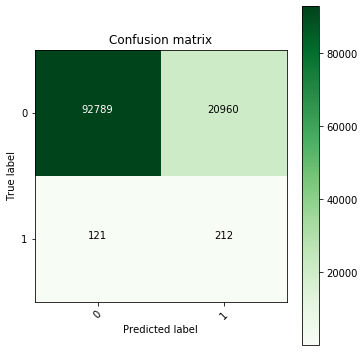

In [69]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - DecisionTreeClassifier -----------\n")
plot_confusion_matrix(cm_dec_tree, classes=class_names)

In [70]:
# classification report for precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    113749
           1       0.01      0.64      0.02       333

    accuracy                           0.82    114082
   macro avg       0.50      0.73      0.46    114082
weighted avg       1.00      0.82      0.90    114082



# SVM

 ## Undersampled data

In [52]:
from sklearn.svm import SVC

In [72]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_new, y_train_new)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


----------- Confusion Matrix - SVM -----------

Confusion matrix

        0      1
0  100523  13226
1     120    213


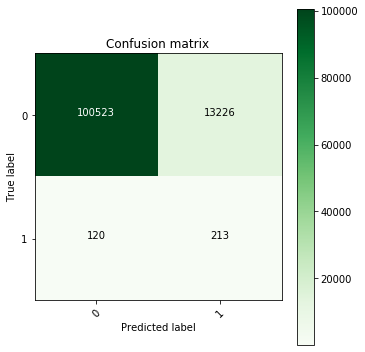

In [73]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - SVM -----------\n")
plot_confusion_matrix(cm_SVM, classes=class_names)

In [74]:
# classification report for precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    113749
           1       0.02      0.64      0.03       333

    accuracy                           0.88    114082
   macro avg       0.51      0.76      0.48    114082
weighted avg       1.00      0.88      0.94    114082



## Oversampled Data

In [53]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_up, y_train_up)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


----------- Confusion Matrix - SVM -----------

Confusion matrix

        0      1
0  102855  10894
1     220    113


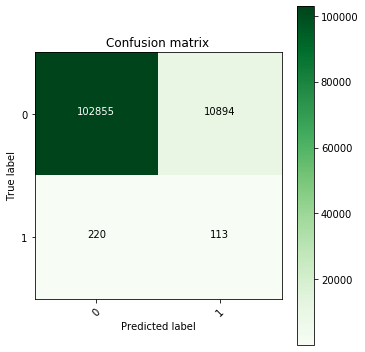

In [54]:
# Plotting Confusion Matrix
print("----------- Confusion Matrix - SVM -----------\n")
plot_confusion_matrix(cm_SVM, classes=class_names)

In [55]:
# classification report for precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    113749
           1       0.01      0.34      0.02       333

    accuracy                           0.90    114082
   macro avg       0.50      0.62      0.48    114082
weighted avg       0.99      0.90      0.95    114082

